In [1]:
# Importing libraries
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,VotingClassifier
from sklearn.linear_model import SGDRegressor, LinearRegression, BayesianRidge, Lasso, HuberRegressor, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import xgboost as xgb
import lightgbm as lgb
np.random.seed(25)

In [2]:
# Loading the dataset
df = pd.read_csv("chennai_house_price_prediction.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
df.shape

(7109, 22)

In [4]:
# Data Exploration
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [5]:
df.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,...,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,2798,NaN,NaN,NaN,NaN,9,3,...,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,P00860,Chrompet,NaN,06-10-2009,NaN,NaN,NaN,NaN,AdjLand,Yes,...,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,12,NaN,NaN,NaN,NaN,1433,3587,...,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,NaN,99.603179,1.637029,1.213260,3.688704,NaN,NaN,...,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,NaN,57.403110,0.802902,0.409639,1.019099,NaN,NaN,...,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,NaN,0.000000,1.000000,1.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,NaN,50.000000,1.000000,1.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,NaN,99.000000,1.000000,1.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,NaN,148.000000,2.000000,1.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07


In [6]:
# Isnull Function
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [7]:
# Datatypes

df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [8]:
df1 = pd.DataFrame(index=df.columns)

In [9]:
df1['data_type'] = df.dtypes
df1['null_count'] = df.isnull().sum()
df1['unique_count'] = df.nunique()

In [10]:
df1

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DATE_SALE,object,0,2798
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3


Text(0.5, 0, 'Sales')

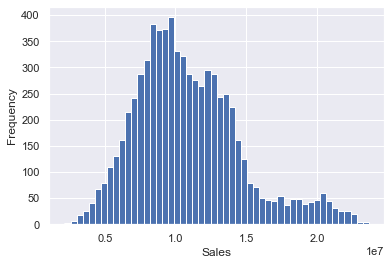

In [11]:
# Univariate Analysis
df['SALES_PRICE'].plot.hist(bins = 50)
plt.xlabel('Sales', fontsize=12)

 These are slightly right skewed as we can see number of prices increases more

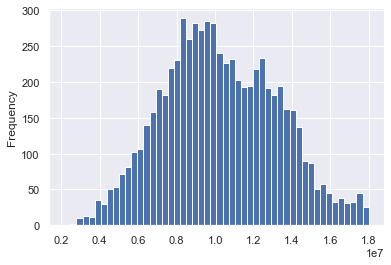

In [12]:
(df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000]).plot.hist(bins=50)

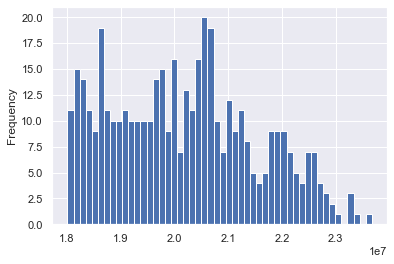

In [13]:
(df['SALES_PRICE'].loc[df['SALES_PRICE']>18000000]).plot.hist(bins=50)

Text(0.5, 0, 'Area in sq feet')

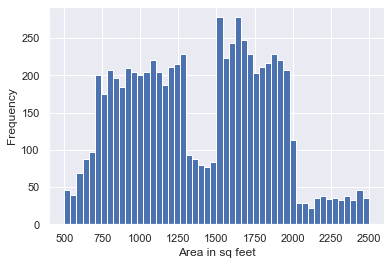

In [14]:
df['INT_SQFT'].plot.hist(bins = 50)
plt.xlabel('Area in sq feet', fontsize=12)

Most houses have the area between 750 sq feet to 1250 sq feet or around 1500 sq feet to 2000 sq feet Very less number of houses have area more than 2000 sq feet or less than 750 sq feet

In [15]:
# Value counts
# number of bedrooms
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [16]:
df['N_BEDROOM'].value_counts()/len(df)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

In [17]:
df['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [18]:
df['N_BATHROOM'].value_counts()/len(df)*100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

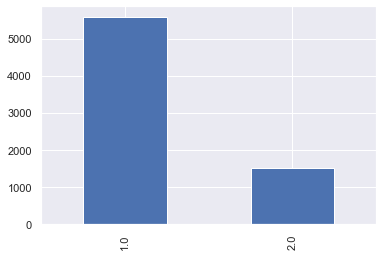

In [19]:
df['N_BATHROOM'].value_counts().plot(kind = 'bar')

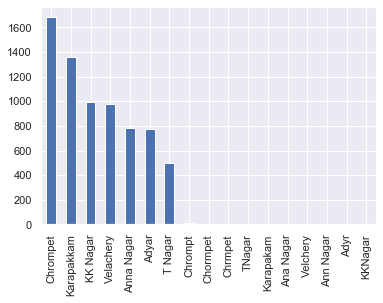

In [20]:
df['AREA'].value_counts().plot(kind = 'bar')

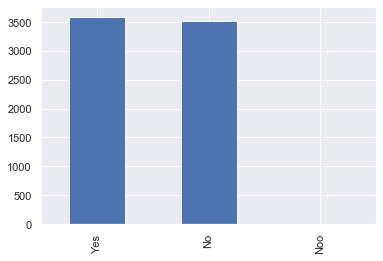

In [21]:
# houses with parking facility

df['PARK_FACIL'].value_counts().plot(kind = 'bar')

In [22]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [23]:
# Data Manipulaion
df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [24]:
df.shape

(7109, 22)

In [25]:
df.drop_duplicates(subset=['AREA']).shape

(17, 22)

In [26]:
df.shape

(7109, 22)

In [27]:
# missing values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [28]:
# Drop row with missing value
df.dropna(axis=0, how='any')

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [29]:
df.shape

(7109, 22)

In [30]:
df.dropna(axis=1, how='any')

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,425350,119098,8507000


In [31]:
df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [32]:
df['N_BEDROOM'].fillna(value=(df['N_BEDROOM'].mode()[0]),inplace=True)

In [33]:
df.loc[df['N_BATHROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,22-03-2010,39,1.0,NaN,4,Partial,No,...,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,451857,85486,12212350
5087,P01333,Chrompet,1016,02-08-2012,105,1.0,NaN,3,AbNormal,Yes,...,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,330086,106479,10647920
6134,P01332,Chormpet,916,02-08-2012,173,1.0,NaN,3,Normal Sale,Yes,...,ELO,Paved,RL,3.4,3.5,3.0,NaN,265423,44237,8847420
6371,P01189,Chrompet,1035,06-11-2012,90,1.0,NaN,3,Partial,No,...,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,223403,24823,8274200
6535,P09189,Anna Nagar,1864,05-03-2007,184,2.0,NaN,5,Family,Yes,...,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,575606,124455,15556920


In [34]:
for i in range(0, len(df)):
    if pd.isnull(df['N_BATHROOM'][i])==True:
        if (df['N_BEDROOM'][i] == 1.0):
            df['N_BATHROOM'][i] = 1.0
        else: 
            df['N_BATHROOM'][i] = 2.0

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
df[[ 'QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [36]:
df1 = (df['QS_ROOMS'] + df['QS_BATHROOM'] + df['QS_BEDROOM'])/3

In [37]:
pd.concat([df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_BEDROOM'], df1], axis=1).head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,0
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000


In [38]:
df.loc[df['QS_OVERALL'].isnull()==True].shape

(48, 22)

In [39]:
def fill_na(x):
    return ((x['QS_ROOMS'] + x['QS_BATHROOM'] + x['QS_BEDROOM'])/3)

In [40]:
df['QS_OVERALL'] =  df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'], axis=1)

In [41]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [42]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [43]:
# data type of n_bedroom, n_room, n_bathroom
df = df.astype({'N_BEDROOM': 'object', 'N_ROOM': 'object', 'N_BATHROOM': 'object'})

In [44]:
df1 = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in df1:
    print('Value Count in', i, ' ')
    print(df[i].value_counts())
    print('')

Value Count in AREA  
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

Value Count in N_BEDROOM  
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

Value Count in N_BATHROOM  
1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64

Value Count in N_ROOM  
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

Value Count in SALE_COND  
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

Value Count in PARK_FACIL  
Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

Val

In [45]:
df['PARK_FACIL'].replace({'Noo':'No'}, inplace = True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [46]:
df['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',  
                    'Chrompt': 'Chrompet', 'Chormpet': 'Chrompet','Chrmpet': 'Chrompet',
                    'Ana Nagar': 'Anna Nagar', 'Ann Nagar': 'Anna Nagar',
                     'Karapakam': 'Karapakkam' , 'Velchery': 'Velachery'}, inplace = True)

In [47]:
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [48]:
df['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial', 
                         'Adj Land': 'AdjLand',  
                         'Ab Normal': 'AbNormal'}, inplace = True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [49]:
df['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace = True)
df['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)
df['BUILDTYPE'].value_counts()
df['UTILITY_AVAIL'].value_counts()
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [50]:
# BIVARIATE ANALYSIS
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


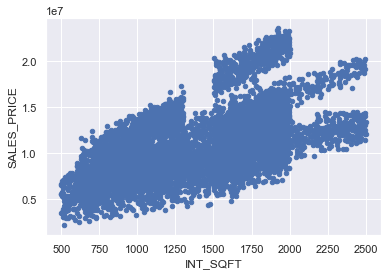

In [51]:
df.plot.scatter('INT_SQFT','SALES_PRICE')

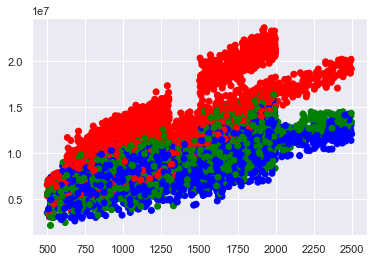

In [52]:
fig, ax = plt.subplots()
colors = {'Commercial':'red', 'House':'blue', 'Others':'green'}
ax.scatter(df['INT_SQFT'], df['SALES_PRICE'], c=df['BUILDTYPE'].apply(lambda x: colors[x]))
plt.show()

In [53]:
# sale price of houses wrt number of bedrooms and bathroomms 
df.pivot_table(values='SALES_PRICE', index='N_BEDROOM', columns='N_BATHROOM', aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12129780.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


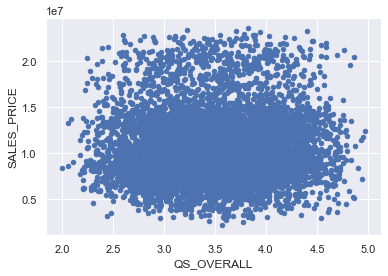

In [54]:
#QS_OVERALL and sales price
df.plot.scatter('QS_OVERALL', 'SALES_PRICE')

Text(0.5, 1.0, 'QS_OVERALL')

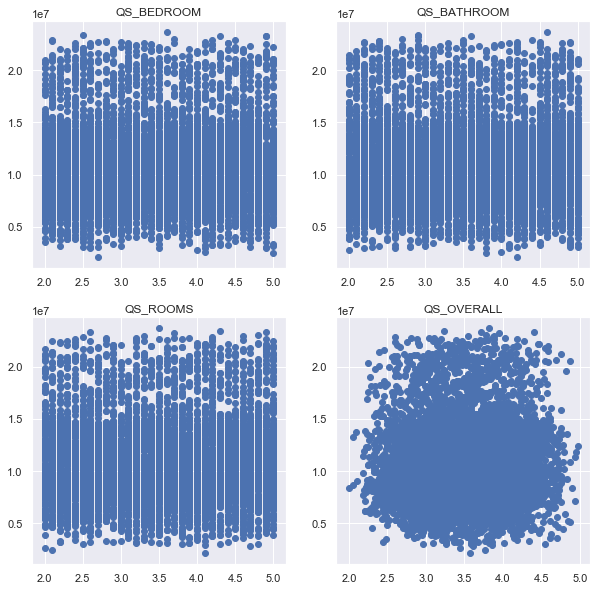

In [55]:
fig, axs = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0, 0].scatter(df['QS_BEDROOM'], df['SALES_PRICE'])    # QS_BEDROOM and sale price
axs[0, 0].set_title('QS_BEDROOM')

axs[0, 1].scatter(df['QS_BATHROOM'], df['SALES_PRICE'])   # QS_BATHROOM and price
axs[0, 1].set_title('QS_BATHROOM')

axs[1, 0].scatter(df['QS_ROOMS'], df['SALES_PRICE'])    # QS_ROOMS and sale price
axs[1, 0].set_title('QS_ROOMS')

axs[1, 1].scatter(df['QS_OVERALL'], df['SALES_PRICE'])    # QS_OVERALL and sale price
axs[1, 1].set_title('QS_OVERALL')

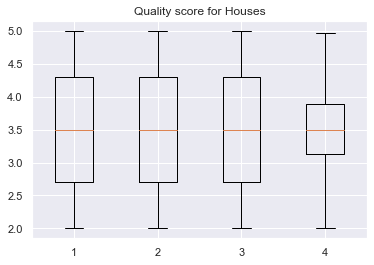

In [56]:
# Create an axes instance
ax = plt.figure().add_subplot(111)
ax.set_title('Quality score for Houses')

# Create the boxplot
bp = ax.boxplot([df['QS_BEDROOM'], df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_OVERALL']])

In [57]:
# SALE PRICE based on building type
df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

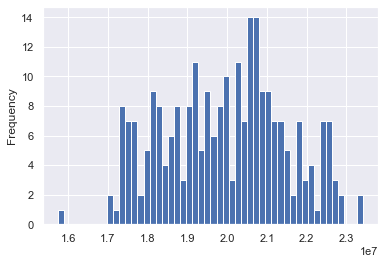

In [58]:
temp_df = df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

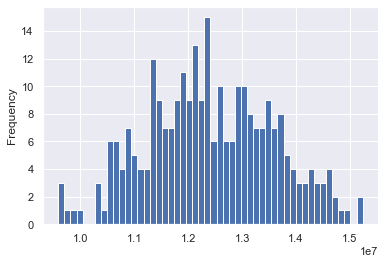

In [59]:
temp_df = df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

In [60]:
# building type and parking facility
df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

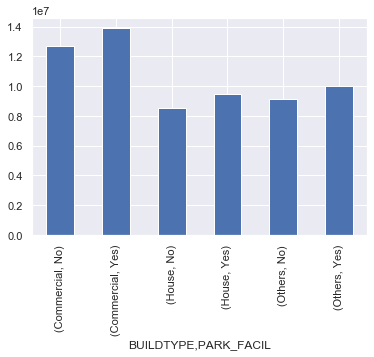

In [61]:
temp = df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()
temp.plot(kind = 'bar', stacked = True)

In [62]:
# average price for each area category

df.pivot_table(values='SALES_PRICE', index='AREA', aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8878350
Anna Nagar,13727895
Chrompet,9606725
KK Nagar,12146740
Karapakkam,7043125
T Nagar,14049650
Velachery,10494410


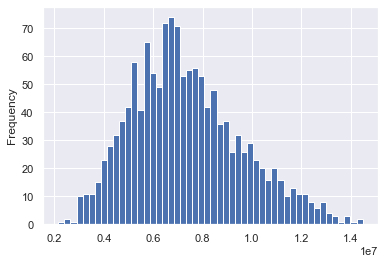

In [63]:
temp_df = df.loc[(df['AREA']=='Karapakkam')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

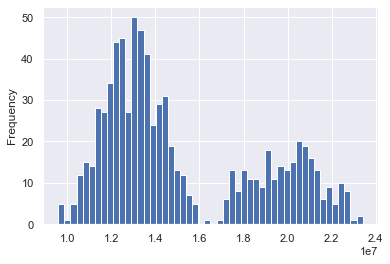

In [64]:
temp_df = df.loc[(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


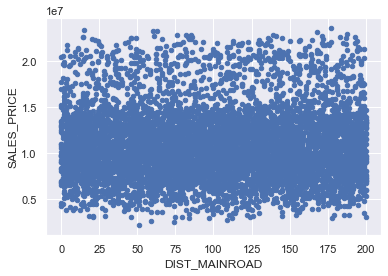

In [65]:
df.plot.scatter('DIST_MAINROAD', 'SALES_PRICE')

In [66]:
df.groupby(['STREET']).SALES_PRICE.median()

STREET
Gravel       10847225
No Access     9406050
Paved        10470070
Name: SALES_PRICE, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


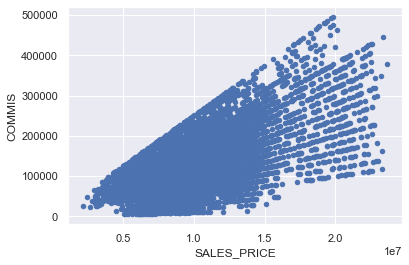

In [67]:
# commission and sales price
df.plot.scatter('SALES_PRICE', 'COMMIS')

In [68]:
df[['SALES_PRICE', 'COMMIS']].corr()

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000


In [69]:
# Linear regression model
df.drop(['PRT_ID'], axis=1, inplace = True)

In [70]:
df = pd.get_dummies(df)

In [71]:
x = df.drop('SALES_PRICE', axis=1)
y= df['SALES_PRICE']

In [72]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [75]:
lreg = LinearRegression()
lreg.fit(train_x, train_y)

LinearRegression()

In [76]:
#Model Evaluation - RMSLE
pred_train = lreg.predict(train_x)
train_score = np.sqrt(mean_squared_log_error(train_y,pred_train))

In [78]:
pred_test = lreg.predict(valid_x)
valid_score=np.sqrt(mean_squared_log_error(valid_y,pred_test))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [80]:
print('Training score:', train_score)
#print('Validation score:', valid_score)

Training score: 0.025161932050240626
